,week,item_sale
0,2012-12-31/2013-01-06,1.423364e+07
1,2013-01-07/2013-01-13,2.241359e+07
2,2013-01-14/2013-01-20,1.940747e+07
3,2013-01-21/2013-01-27,1.773457e+07
4,2013-01-28/2013-02-03,2.158215e+07
...,...,...
147,2015-10-26/2015-11-01,1.737728e+07
148,2015-11-02/2015-11-08,1.598189e+07
149,2015-11-09/2015-11-15,5.468444e+06
150,2015-11-30/2015-12-06,1.224463e+07


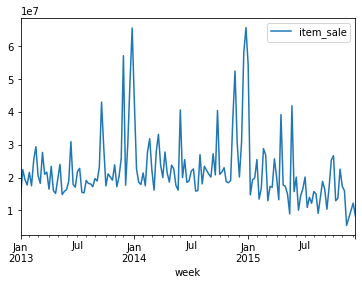

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame

    
df1 = pd.read_csv('sales_train.csv')
df2 = pd.read_csv('items.csv')


#add a column named item_sale
df3 = pd.merge(df1,df2).drop('item_name', axis=1)
df3['item_sale'] = df3.item_price*df3.item_cnt_day

#drop the colums not needed
df4 = df3.drop(['date_block_num','shop_id','item_id','item_price','item_cnt_day','item_category_id'],axis=1)

#Groupby on date
df5 = df4.groupby('date')['item_sale'].sum().reset_index()

#convert date to datetime format
df5['date']= pd.to_datetime(df5['date'])


df5['month'] = pd.to_datetime(df5['date']).dt.to_period('M')
df5['year'] = pd.DatetimeIndex(df5['date']).year

df6 = df5.groupby('date')['item_sale'].sum().reset_index()
df6['year'] = pd.DatetimeIndex(df6['date']).year
df6 = df6.sort_values('date')

df6['week'] = pd.to_datetime(df6['date']).dt.to_period('W')
df6['week_number'] = pd.DatetimeIndex(df6['date']).week

df8 = df6.groupby('week')['item_sale'].sum().reset_index()


df8.plot(x='week',y='item_sale')
df8

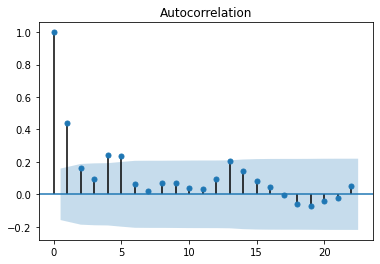

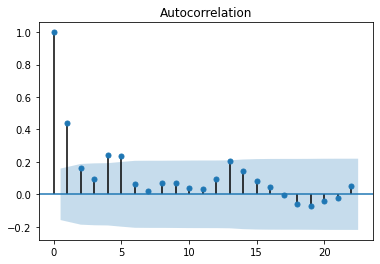

In [9]:
#Stationarity test
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df8['item_sale'])

In [10]:
#Train and test data
W = df8['item_sale'].values
df8_train = W[0:103]
df8_test = W[104:151]

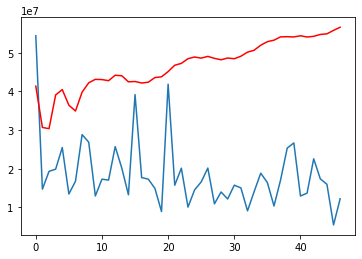

In [11]:
#Arima 
from statsmodels.tsa.arima_model import ARIMA
model_df8 = ARIMA(df8_train, order=(9,1,4))
model_df8_fit = model_df8.fit()

pred_df8 = model_df8_fit.forecast(steps=47)[0]

plt.plot(df8_test) 
plt.plot(pred_df8, color='red')

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


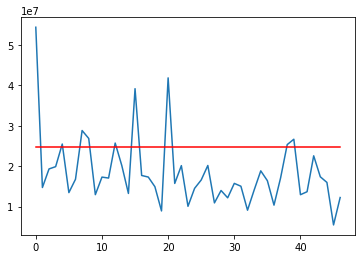

In [12]:
#ETS model-1
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model_df8_ETS = SimpleExpSmoothing(np.asarray(df8_train))
model_df8_fit_ETS = model_df8_ETS.fit(smoothing_level=.01)
pred1_df8 = model_df8_fit_ETS.forecast(47)
plt.plot(df8_test)
plt.plot(pred1_df8, color='red')

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


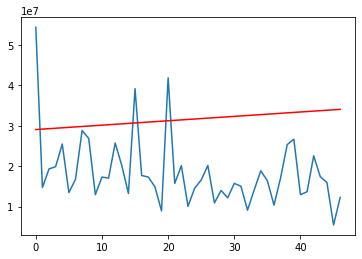

In [13]:
#ETS model-2
model1_df8_ETS = Holt(np.asarray(df8_train))

model1_df8_ETS_fit = model1_df8_ETS.fit(smoothing_level=0.03, smoothing_slope=.02)

pred2_df8 = model1_df8_ETS_fit.forecast(47)

plt.plot(df8_test)
plt.plot(pred2_df8, color='red')